In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

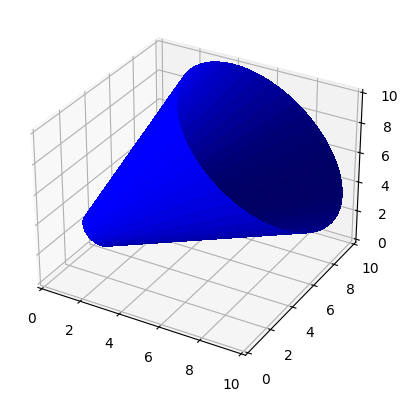

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm
import pylab as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')


def truncated_cone(p0, p1, R0, R1, color):
    """
    Based on https://stackoverflow.com/a/39823124/190597 (astrokeat)
    """
    # vector in direction of axis
    v = p1 - p0
    # find magnitude of vector
    mag = norm(v)
    # unit vector in direction of axis
    v = v / mag
    # make some vector not in the same direction as v
    not_v = np.array([1, 1, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])
    # make vector perpendicular to v
    n1 = np.cross(v, not_v)
    # print n1,'\t',norm(n1)
    # normalize n1
    n1 /= norm(n1)
    # make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)
    # surface ranges over t from 0 to length of axis and 0 to 2*pi
    n = 80
    t = np.linspace(0, mag, n)
    theta = np.linspace(0, 2 * np.pi, n)
    # use meshgrid to make 2d arrays
    t, theta = np.meshgrid(t, theta)
    R = np.linspace(R0, R1, n)
    # generate coordinates for surface
    X, Y, Z = [p0[i] + v[i] * t + R *
               np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    ax.plot_surface(X, Y, Z, color=color, linewidth=0, antialiased=False)


A0 = np.array([1, 3, 2])
A1 = np.array([8, 5, 9])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
truncated_cone(A0, A1, 1, 5, 'blue')
plt.show()

In [ ]:
#Inputs for 